In [2]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.2.0     ✔ purrr   0.3.2
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [3]:
sr <- read_csv('master.csv')

Parsed with column specification:
cols(
  country = col_character(),
  year = col_double(),
  sex = col_character(),
  age = col_character(),
  suicides_no = col_double(),
  population = col_double(),
  `suicides/100k pop` = col_double(),
  `country-year` = col_character(),
  `HDI for year` = col_double(),
  `gdp_for_year ($)` = col_number(),
  `gdp_per_capita ($)` = col_double(),
  generation = col_character()
)


In [4]:
glimpse(sr)

Observations: 27,820
Variables: 12
$ country              <chr> "Albania", "Albania", "Albania", "Albania", "Alb…
$ year                 <dbl> 1987, 1987, 1987, 1987, 1987, 1987, 1987, 1987, …
$ sex                  <chr> "male", "male", "female", "male", "male", "femal…
$ age                  <chr> "15-24 years", "35-54 years", "15-24 years", "75…
$ suicides_no          <dbl> 21, 16, 14, 1, 9, 1, 6, 4, 1, 0, 0, 0, 2, 17, 1,…
$ population           <dbl> 312900, 308000, 289700, 21800, 274300, 35600, 27…
$ `suicides/100k pop`  <dbl> 6.71, 5.19, 4.83, 4.59, 3.28, 2.81, 2.15, 1.56, …
$ `country-year`       <chr> "Albania1987", "Albania1987", "Albania1987", "Al…
$ `HDI for year`       <dbl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, …
$ `gdp_for_year ($)`   <dbl> 2156624900, 2156624900, 2156624900, 2156624900, …
$ `gdp_per_capita ($)` <dbl> 796, 796, 796, 796, 796, 796, 796, 796, 796, 796…
$ generation           <chr> "Generation X", "Silent", "Generation X", "G.I. …


In [46]:
# Eliminando valores perdidos
sr_no_na <- sr %>%
  na.omit()

# Seleccionando los atributos de segmentación.
sr1 <- sr %>%
  na.omit() %>%
  select(suicides_no, `suicides/100k pop`, `gdp_for_year ($)`, `gdp_per_capita ($)`)

### Resumen de cada punto de datos

In [59]:
sum <- sr_no_na %>% select(-country, -age, -sex, -year) %>% summary()
sum

  suicides_no        population       suicides/100k pop country-year      
 Min.   :    0.0   Min.   :     875   Min.   :  0.00    Length:8364       
 1st Qu.:    3.0   1st Qu.:  121642   1st Qu.:  1.04    Class :character  
 Median :   27.0   Median :  472250   Median :  5.72    Mode  :character  
 Mean   :  206.1   Mean   : 1852173   Mean   : 11.99                      
 3rd Qu.:  127.2   3rd Qu.: 1500290   3rd Qu.: 15.44                      
 Max.   :11767.0   Max.   :43509335   Max.   :187.06                      
  HDI for year    gdp_for_year ($)    gdp_per_capita ($)  generation       
 Min.   :0.4830   Min.   :3.963e+08   Min.   :   313     Length:8364       
 1st Qu.:0.7130   1st Qu.:1.431e+10   1st Qu.:  4862     Class :character  
 Median :0.7790   Median :6.176e+10   Median : 12584     Mode  :character  
 Mean   :0.7766   Mean   :5.477e+11   Mean   : 21074                       
 3rd Qu.:0.8550   3rd Qu.:3.115e+11   3rd Qu.: 30271                       
 Max.   :0.9440   M

In [60]:
# Análisis de cluster jerárquico

# La agrupación jerárquica agrupa las observaciones en función de sus distancias en pares. 
# Primero, se escalarán los valores ya que hay varias unidades de medida entre las variables. 
# Luego, las distancias en pares se calcularán utilizando el método euclidiano.

In [61]:
# Visualizando las distancias de los pares

# El siguiente histograma muestra que una distancia euclidiana de dos es la distancia más frecuente
# entre las distancias por pares.

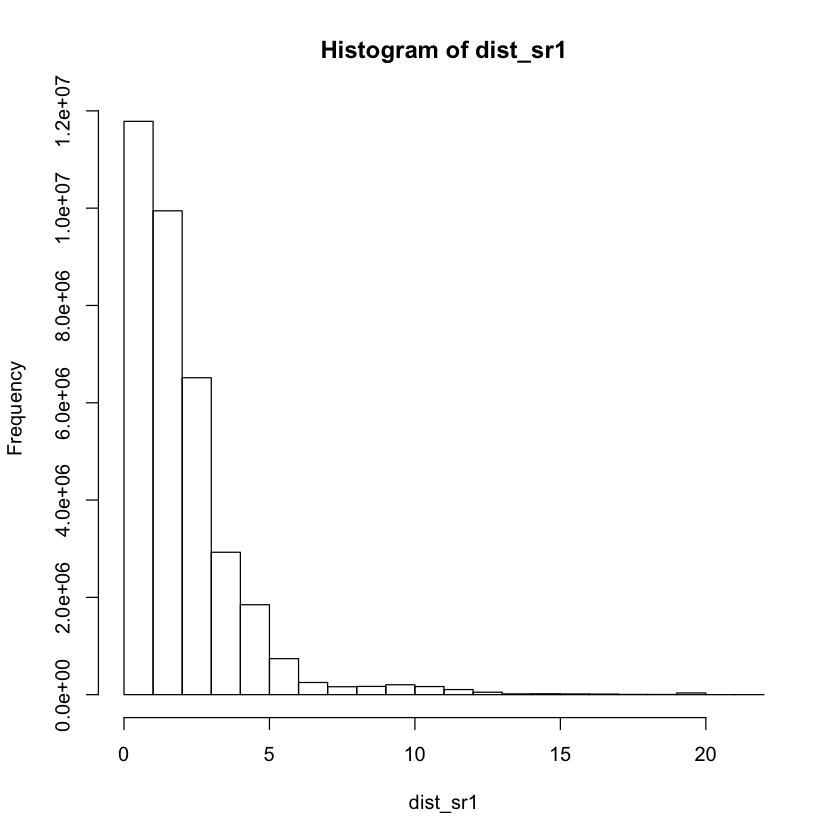

In [62]:
# Escala sr1 y distancia euclidiana de observaciones sr1
dist_sr1 <- dist(scale(sr1))

# Visualizando distancias en pares
hist(dist_sr1)

In [63]:
# Análisis de vinculación de clusters.
hclust_sr1 <- hclust(dist_sr1, method = "complete")

library(dendextend)

sr1_dendrogram <- as.dendrogram(hclust_sr1)

sr1_dendrogram_color <- color_branches(sr1_dendrogram, h = 8)

# Extraer grupo de cluster
cluster <- cutree(hclust_sr1, k=4)

# Agregar valores de grupo de cluster a observaciones
sr2 <- sr_no_na %>% mutate(cluster = cluster)

In [64]:
# Dendrograma de grupos

# Usando hclust (), se completó un análisis de vinculación utilizando el método "complete" para vincular distancias. 
# Después de una inspección visual del dendrograma, se probó con varios números de clúster y también se utilizó 
# varias relaciones bivariadas para determinar qué cantidad de clúster segmenta mejor los datos. 
# Se consideró el método tradicional de selección de k mediante el trazado de las distancias en función del número
# de conglomerados; sin embargo, los datos son demasiado grandes y se identificaron más de 900 conglomerados.

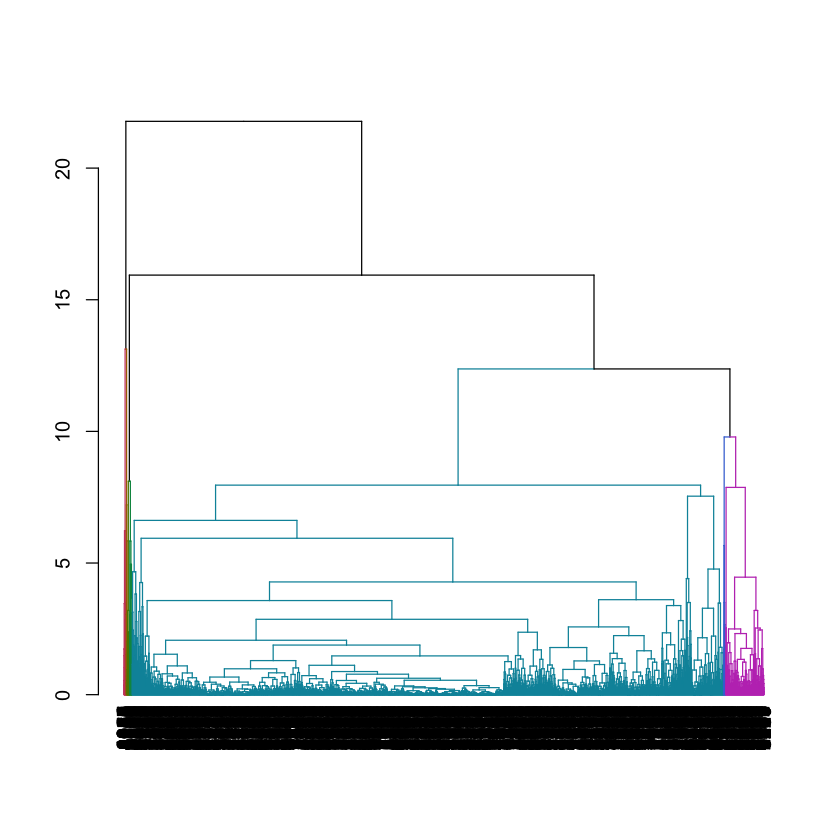

In [65]:
plot(sr1_dendrogram_color)

In [66]:
# Analizando las relaciones bivariadas

# Se analizó las diversas combinaciones de distancias de pares utilizando gráficos 2D. 
# Esto se hizo para seleccionar las variables que mejor visualizan los segmentos del clúster. 
# Se seleccionó variables analizando la forma y la fuerza de varias relaciones bivariadas. 
# Se colocó una línea de regresión en la gráfica para comprender mejor las relaciones.

# La relación entre las variables 'Suicides_no' y 'GDP for Year' tuvo la asociación más fuerte 
# de todas las demás relaciones bivariadas, como se muestra a continuación.

In [67]:
# Caracterizando y visualizando relación bivariada
sr2_lr <- ggplot(sr2, aes(x = `gdp_for_year ($)`, y = suicides_no)) +
              geom_point() +
              geom_smooth(method = "lm", se = FALSE) +
              scale_y_log10() +
              scale_x_log10()

Warning message:
“Transformation introduced infinite values in continuous y-axis”Warning message:
“Transformation introduced infinite values in continuous y-axis”Warning message:
“Removed 1157 rows containing non-finite values (stat_smooth).”

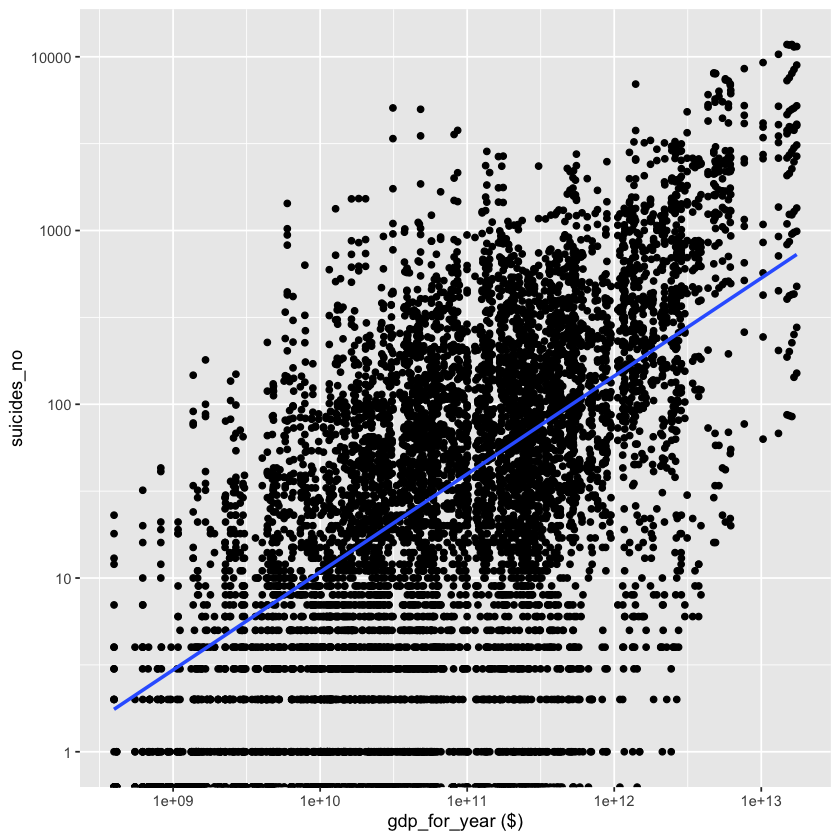

In [68]:
sr2_lr

In [69]:
# Visualización de agrupaciones

# Usando las variables seleccionadas (Número de suicidios y PIB por año), se construyeron diagramas 2D 
# para visualizar los grupos. Se agregaron líneas de regresión para cada grupo para demostrar cómo se relacionan
# las variables dentro de cada grupo. Se quitaron las escalas de registro de cada eje para distinguir los grupos.

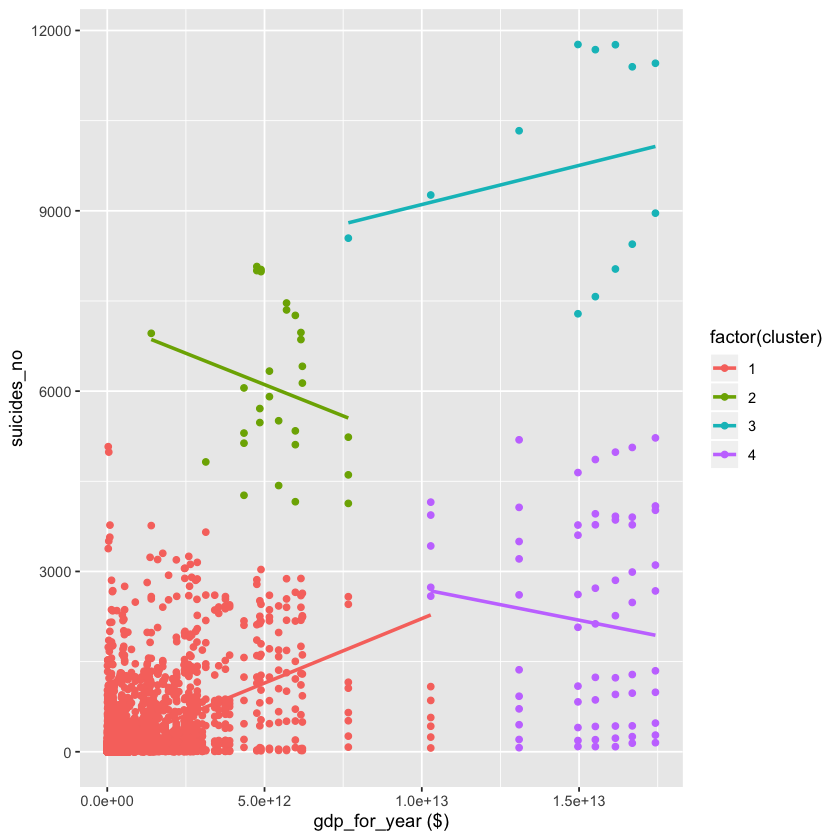

In [80]:
# Visualización de agrupamientos y su línea de regresión.
sr2_plot <- ggplot(sr2, aes(y=suicides_no, x=`gdp_for_year ($)`, color = factor(cluster))) +
                geom_point() +
                geom_smooth(method = "lm", se = FALSE)

sr2_plot

In [71]:
# Perfilando e interpretando cada grupo

# Para comprender lo que sucede en cada grupo, se visualiza cada grupo y se describe en función del país, 
# el sexo y la edad. Sus perfiles se visualizan por color.

# Cluster 1: incluye la mayor parte de los puntos de datos. La mayoría de las víctimas de suicidio 
# se encuentran en este grupo y no existe un elemento de perfil único basado en los datos que tenemos. 

Warning message:
“Transformation introduced infinite values in continuous x-axis”

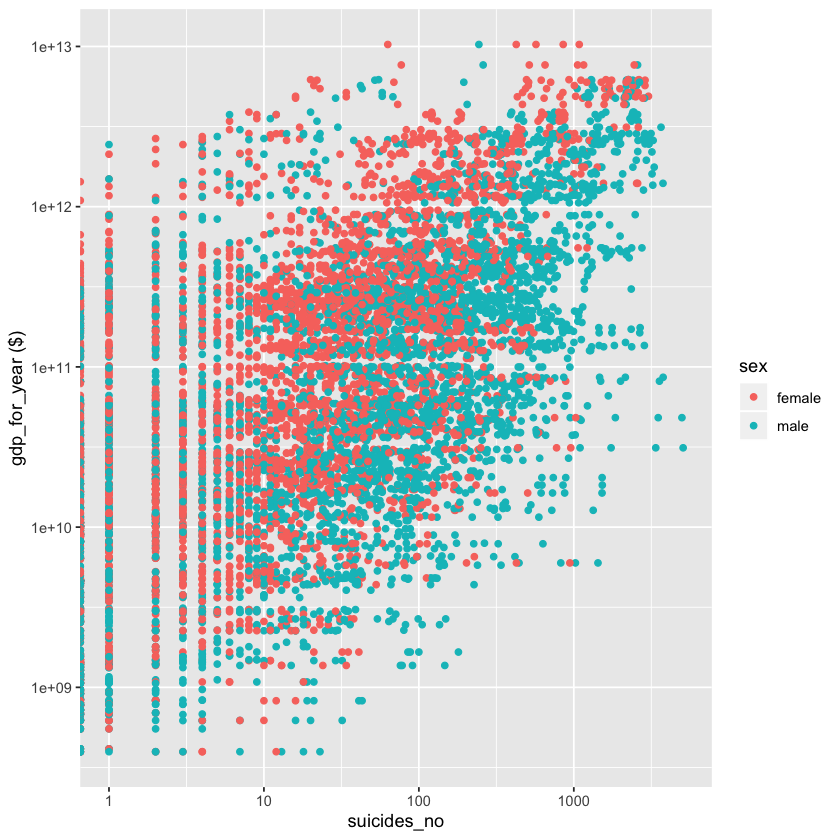

In [81]:
cluster1 <- sr2 %>%
                filter(cluster ==  1) %>% 
                     ggplot(aes(x = suicides_no, y = `gdp_for_year ($)`, color = sex)) +
                         geom_point() +
                         scale_y_log10() +
                         scale_x_log10()

cluster1

In [82]:
# Cluster 2

# Las víctimas en el Grupo 2 son de Japón y los Estados Unidos.
#     Todos son hombres.
#     Sus edades van desde los 15 a los 74 años, y el grupo de edades de 35 a 54 años tiene el mayor valor
#     en Número de suicidios.

# El grupo 2 se visualiza a continuación; perfilado por país

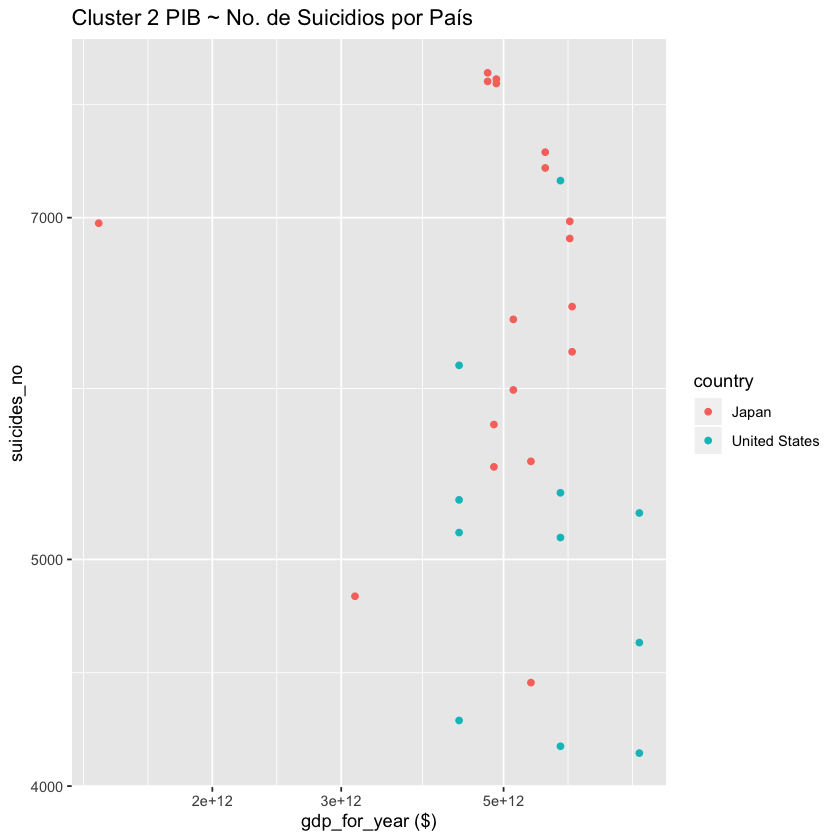

In [83]:
cluster2_country <- sr2 %>%
                filter(cluster ==  2) %>%
                    ggplot(aes(y = suicides_no, x = `gdp_for_year ($)`, color = `country`)) +
                        geom_point()+
                        scale_y_log10() +
                        scale_x_log10() +
                        ggtitle("Cluster 2 PIB ~ No. de Suicidios por País")

cluster2_country

In [86]:
# Grupo 3

#     Las víctimas en el grupo 3 son todas de los Estados Unidos.
#     Todos son hombres.
#     Sus edades van desde los 35 a los 74 años, y el grupo de edades de 35 a 54 años tiene el mayor número 
#     de observaciones.

# El grupo 3 se visualiza a continuación; perfilado por grupo de edad

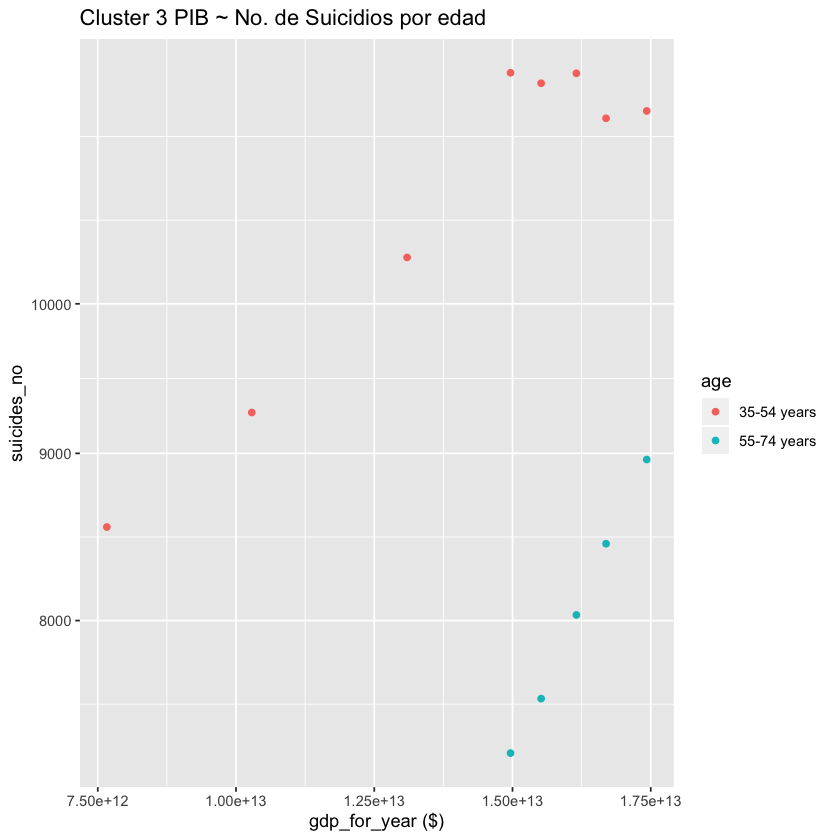

In [87]:
cluster3_age <- sr2 %>% 
                filter(cluster ==  3) %>%
                    ggplot(aes(y = suicides_no, x = `gdp_for_year ($)`, color = `age`)) +
                        geom_point() +
                          scale_y_log10() +
                          ggtitle("Cluster 3 PIB ~ No. de Suicidios por edad")

cluster3_age

In [88]:
# Cluster 4

# Las víctimas en el grupo 4 son todas de los Estados Unidos.
# Están compuestos por hombres y mujeres, sin embargo, la mayoría de las víctimas en este grupo son mujeres.

# El grupo 4 se visualiza a continuación; perfilado por año

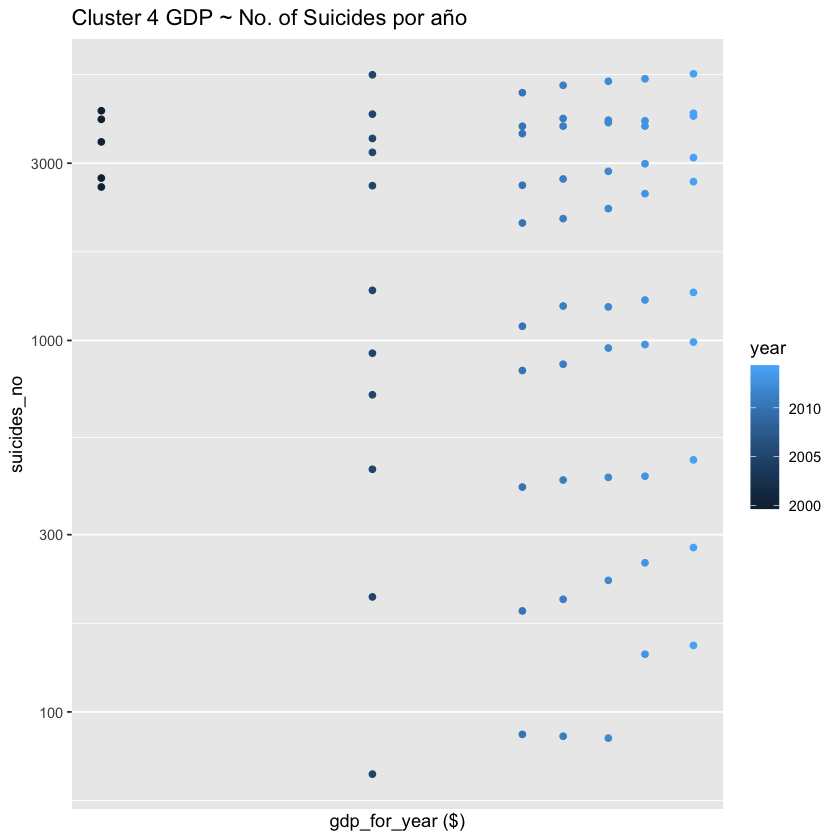

In [150]:
cluster4_country <- sr2 %>%
                filter(cluster ==  4) %>%
                    ggplot(aes(y = suicides_no, x = `gdp_for_year ($)`, color = `year`)) +
                        geom_point()+
                        scale_y_log10() +
                        scale_x_log10() +
                        ggtitle("Cluster 4 GDP ~ No. of Suicides por año")

cluster4_country

In [157]:
# Resumen de los promedios por grupo

# En este segundo análisis, se resumiran los promedios de cada variable: número de suicidios, 
# suicidios por cada 100,000 personas, PIB por año y PIB per cápita. Los promedios 
# para cada par de clúster / variable se muestran en una tabla. Luego se visualiza en un diagrama de serpiente.

In [170]:
# Resumen del promedio de la población
pop <- sr2 %>% summarize(
  suicides_no = mean(suicides_no),
  `suicides/100k pop` = mean(`suicides/100k pop`), 
  `gdp_for_year ($)` = mean(`gdp_for_year ($)`),
  `gdp_per_capita ($)` = mean(`gdp_per_capita ($)`),
  `HDI for year` = mean(`HDI for year`)) %>%
  mutate(cluster = "pop") 

# reordenar columnas
pop <- pop[,c(6,1,2,3,4,5)]

# resumen de la media para cada grupo
summary <- sr2 %>% group_by(cluster) %>% summarize(
          suicides_no = mean(suicides_no),
          `suicides/100k pop` = mean(`suicides/100k pop`), 
          `gdp_for_year ($)` = mean(`gdp_for_year ($)`),
          `gdp_per_capita ($)` = mean(`gdp_per_capita ($)`),
          `HDI for year` = mean(`HDI for year`))

# combinando la población y los promedios de los conglomerados en una tabla
summary <- add_row(summary, cluster = "pop",
                suicides_no = 206.1243,
               `suicides/100k pop`= 11.99194,
               `gdp_for_year ($)`= 547663851141,
               `gdp_per_capita ($)` = 21074.37,
               `HDI for year` = 0.7766011,
                    .before = 1)

In [171]:
# Resumen rotativo con cada agrupación como columnas.
summary <- as.data.frame(t(summary))
summary$profiling_var <- rownames(summary)
summary <- summary[-c(1), ]

# volver a agregar nombres de columnas
colnames(summary) <- c("Population", "Cluster 1", " Cluster 2", "Cluster 3", "Cluster 4")
colnames(summary)[6] <- "profiling_var"

# convertir el resumen en un tabla y cambiar la clase de col 1-4 como numérico
summary <- tbl_df(summary)
summary <- summary %>% mutate_at(vars(1:5), as.character)
summary <- summary %>% mutate_at(vars(1:5), as.numeric)

In [172]:
summary

Population,Cluster 1,Cluster 2,Cluster 3,Cluster 4,profiling_var
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
2.061243e+02,1.549586e+02,6.035552e+03,9.730692e+03,2.169030e+03,suicides_no
1.199194e+01,1.189289e+01,3.411034e+01,2.645846e+01,1.181333e+01,suicides/100k pop
5.476639e+11,3.912228e+11,5.349899e+12,1.481199e+13,1.519730e+13,gdp_for_year ($)
2.107437e+04,2.072287e+04,3.566069e+04,5.149869e+04,5.264186e+04,gdp_per_capita ($)
7.766011e-01,7.750466e-01,8.637586e-01,9.058462e-01,9.073030e-01,HDI for year


In [173]:
# Análisis del diagrama de serpiente por grupo

#     Los grupos 3 y 4 se empatan para obtener el PIB promedio más alto por año.
#     El grupo 4 tiene el promedio más alto de suicidios.
#     El grupo 2, sin embargo, tiene la tasa de suicidio promedio más alta (por cada 100 mil personas), 
#     mientras que tiene el segundo PIB promedio más alto por año y el número de suicidios.
#     Los grupos 2 y 3 tienen el promedio más alto de suicidios y la tasa de suicidios.

In [174]:
# Transformando resumen a un largo tbl
library(reshape2)
summary_melt <- melt(summary, id = "profiling_var")

# Nombrar columnas y convertir de nuevo a tbl
colnames(summary_melt)[3] <- "mean"
colnames(summary_melt)[2] <- "cluster"
summary_melt <- tbl_df(summary_melt)

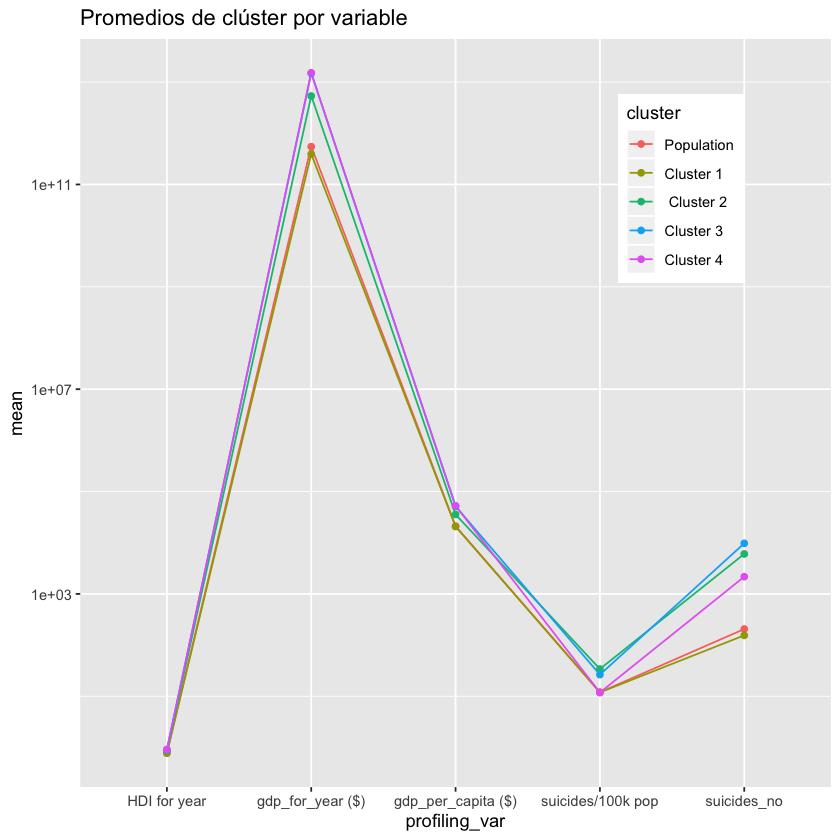

In [175]:
snake_plot <- summary_melt %>%
                    ggplot(aes(x=profiling_var, y= mean, group = cluster, color = cluster)) + 
                    geom_line() +
                    geom_point() +
                    scale_y_log10() +
                    ggtitle("Promedios de clúster por variable") +
                    theme(legend.position = c(0.8, 0.8))
snake_plot

In [176]:
# Para una mejor visualización, proporcioné una segunda versión del gráfico de serpientes a continuación, 
# sin PIB por año ni IDH por año.

In [165]:
summary_melt2 <- summary_melt %>% filter(profiling_var != "gdp_for_year ($)", profiling_var != "HDI for year")

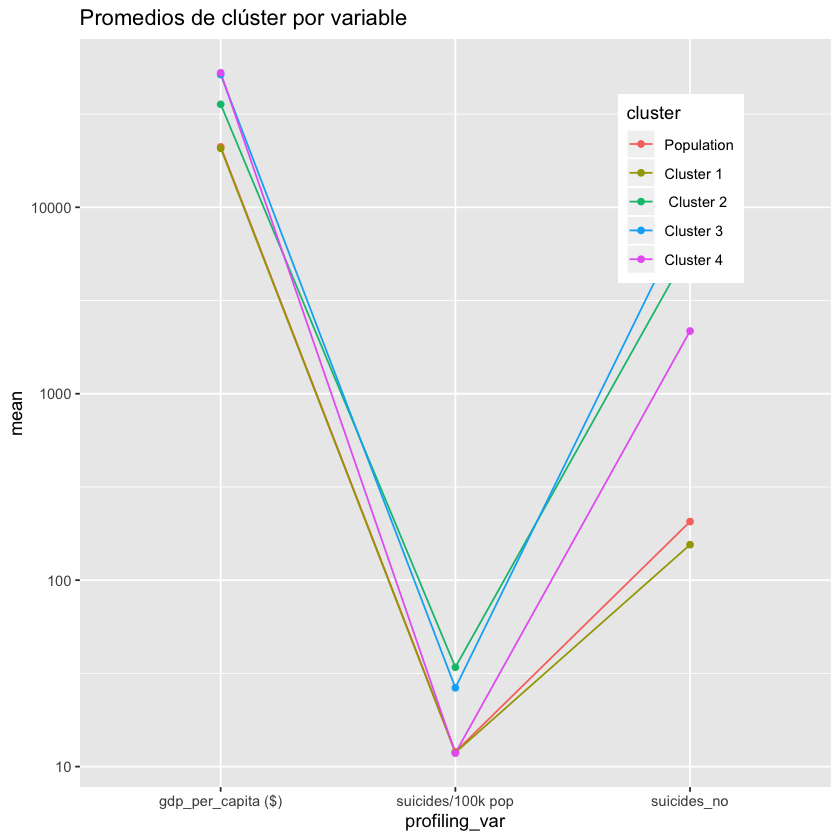

In [177]:
snake_plot2 <- summary_melt2 %>%
                    ggplot(aes(x=profiling_var, y= mean, group = cluster, color = cluster)) + 
                    geom_line() +
                    geom_point() +
                    scale_y_log10() +
                    ggtitle("Promedios de clúster por variable") +
                    theme(legend.position = c(0.8, 0.8))

snake_plot2